In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import misc # pip install Pillow
import matplotlib.pylab as pylab

%matplotlib inline
pylab.rcParams['figure.figsize'] = (20.0, 7.0)

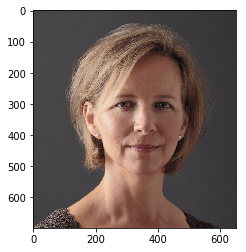

In [2]:
import os
import imageio

im = imageio.imread('C:/Users/Hp/.anaconda/sample.jpg').astype(float)


f = plt.figure()
#plt.imshow(im,cmap='gray')
#plt.imshow((im * 255).astype(np.uint8))
plt.imshow(np.array(im,np.int32),cmap='gray')


In [3]:
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )

def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [4]:
imsize = im.shape
dct = np.zeros(imsize)
# Do 8x8 DCT on image (in-place)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( im[i:(i+8),j:(j+8)] )

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'An 8x8 DCT block')

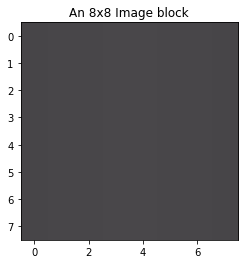

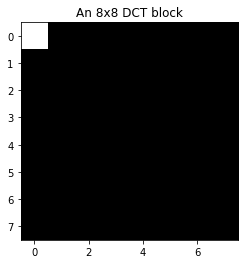

In [5]:
pos = 128

# Extract a block from image
plt.figure()
plt.imshow(np.array(im[pos:pos+8,pos:pos+8],np.int32),cmap='gray')
plt.title( "An 8x8 Image block")

# Display the dct of that block
plt.figure()

plt.imshow(np.array(dct[pos:pos+8,pos:pos+8],np.int32),cmap='gray')
plt.title( "An 8x8 DCT block")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '8x8 DCTs of the image')

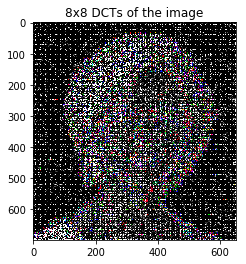

In [6]:
# Display entire DCT
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Keeping only 13.040115% of the DCT coefficients


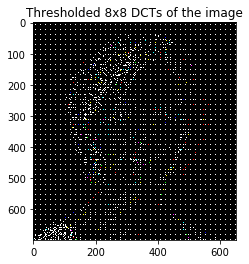

In [7]:
# Threshold
thresh = 0.012
dct_thresh = dct * (abs(dct) > (thresh*np.max(dct)))


plt.figure()
plt.imshow(dct_thresh,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "Thresholded 8x8 DCTs of the image")

percent_nonzeros = np.sum( dct_thresh != 0.0 ) / (imsize[0]*imsize[1]*1.0)

print ("Keeping only %f%% of the DCT coefficients" % (percent_nonzeros*100.0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


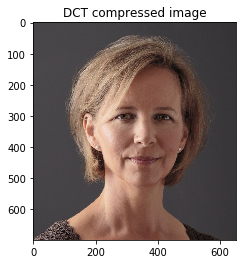

In [8]:
im_dct = np.zeros(imsize)
for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct_thresh[i:(i+8),j:(j+8)])   
        

plt.figure()
plt.imshow(np.array(im_dct,np.int32),cmap='gray',vmax = np.max(im_dct)*0.01,vmin = 0)

plt.title("DCT compressed image" )
plt.imshow(np.array(im,np.int32),cmap='gray',vmax=np.max(im)*0.01,vmin=0)